In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_excel("default_of_credit_card_clients_0.xlsx")

In [3]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
credit.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Analyze the trend on outstanding amount for the bank 
#1. Overall outstanding amount trends


In [5]:
Overall_Outstanding = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum()

In [6]:
Overall_Outstanding

BILL_AMT1    1536699927
BILL_AMT2    1475372255
BILL_AMT3    1410394644
BILL_AMT4    1297888469
BILL_AMT5    1209342029
BILL_AMT6    1166152812
dtype: int64

In [7]:
time_periods = ['September', 'August', 'July', 'june', 'may', 'April']

In [8]:
time_periods

['September', 'August', 'July', 'june', 'may', 'April']

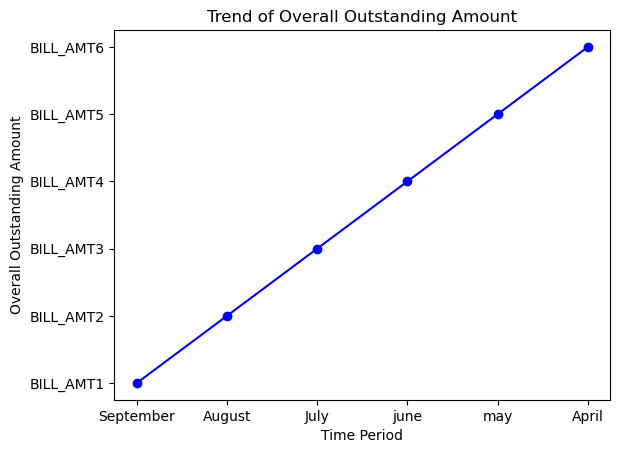

In [9]:
Overall_Outstanding_amount = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
time_periods = ['September', 'August', 'July', 'june', 'may', 'April']

plt.plot(time_periods,Overall_Outstanding_amount, marker='o', linestyle='-', color='b')
plt.xlabel('Time Period')
plt.ylabel('Overall Outstanding Amount')
plt.title('Trend of Overall Outstanding Amount')
plt.show()

In [ ]:
#2. Number of customers with outstanding amount (in different outstanding amount buckets)

In [12]:
import pandas as pd

# Define the outstanding amount buckets
outstanding_buckets = [0, 10000, 20000, 30000, 40000, 50000, 100000, float('inf')]
bucket_labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-100k', '>100k']

# Iterate over the columns and calculate the bucket counts for each
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    # Create a new column 'Outstanding_Bucket' based on the outstanding amount
    credit['Outstanding_Bucket'] = pd.cut(credit[col], bins=outstanding_buckets, labels=bucket_labels)

    # Count the number of customers in each bucket
    bucket_counts = credit['Outstanding_Bucket'].value_counts()

    # Print the bucket counts for the current column
    print(f"Bucket counts for {col}:")
    print(bucket_counts)
    print()


Bucket counts for BILL_AMT1:
<10k        8257
>100k       4906
50k-100k    4600
10k-20k     3543
20k-30k     2483
40k-50k     2089
30k-40k     1524
Name: Outstanding_Bucket, dtype: int64

Bucket counts for BILL_AMT2:
<10k        7906
>100k       4664
50k-100k    4539
10k-20k     3527
20k-30k     2558
40k-50k     2021
30k-40k     1610
Name: Outstanding_Bucket, dtype: int64

Bucket counts for BILL_AMT3:
<10k        7718
50k-100k    4382
>100k       4379
10k-20k     3713
20k-30k     2709
40k-50k     1919
30k-40k     1655
Name: Outstanding_Bucket, dtype: int64

Bucket counts for BILL_AMT4:
<10k        7700
50k-100k    4073
10k-20k     4044
>100k       3966
20k-30k     2993
40k-50k     1736
30k-40k     1618
Name: Outstanding_Bucket, dtype: int64

Bucket counts for BILL_AMT5:
<10k        7958
10k-20k     4149
50k-100k    3872
>100k       3663
20k-30k     3057
40k-50k     1602
30k-40k     1538
Name: Outstanding_Bucket, dtype: int64

Bucket counts for BILL_AMT6:
<10k        7977
10k-20k     39

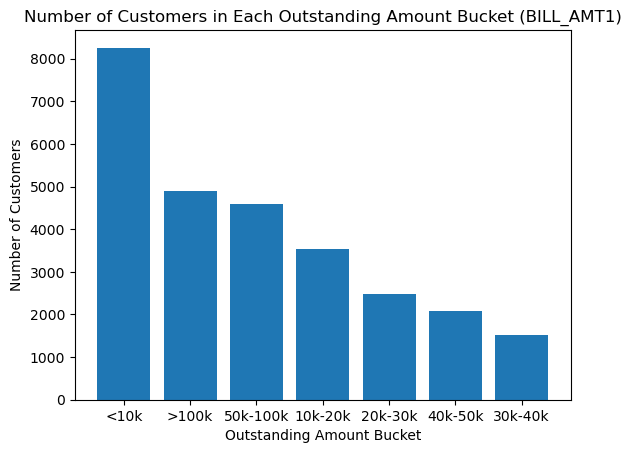

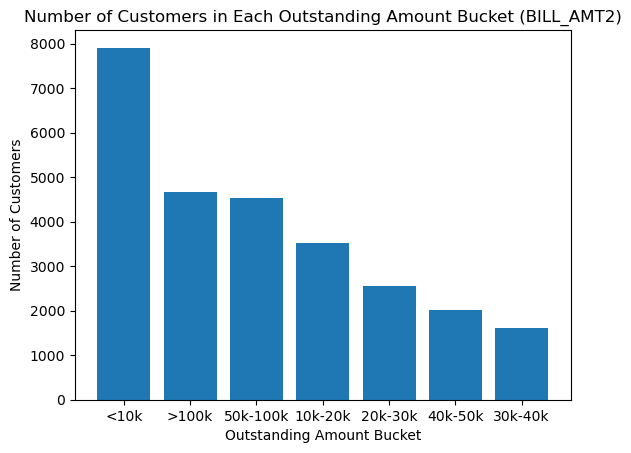

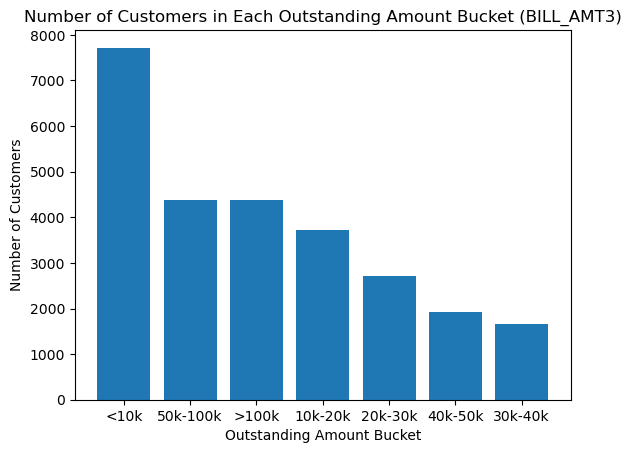

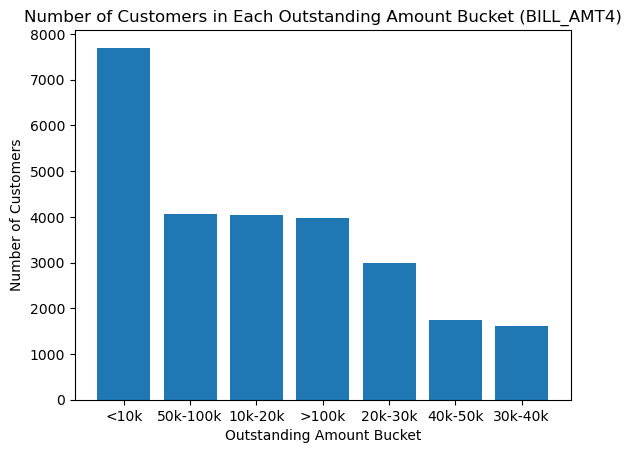

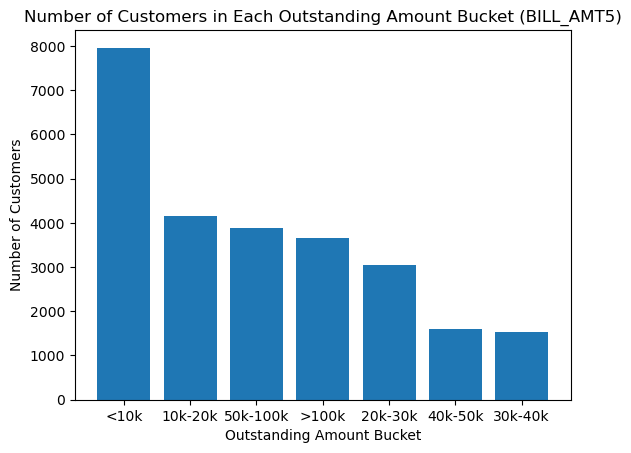

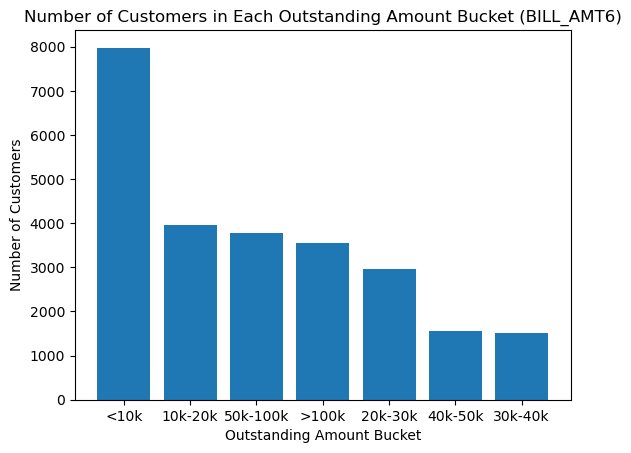

In [13]:
import matplotlib.pyplot as plt

# Iterate over the columns and plot the bucket counts for each
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    # Create a new column 'Outstanding_Bucket' based on the outstanding amount
    credit['Outstanding_Bucket'] = pd.cut(credit[col], bins=outstanding_buckets, labels=bucket_labels)

    # Count the number of customers in each bucket
    bucket_counts = credit['Outstanding_Bucket'].value_counts()

    # Plot the bucket counts as a bar chart
    plt.bar(bucket_counts.index, bucket_counts.values)

    # Add labels and title
    plt.xlabel('Outstanding Amount Bucket')
    plt.ylabel('Number of Customers')
    plt.title(f'Number of Customers in Each Outstanding Amount Bucket ({col})')

    # Show the chart
    plt.show()

In [ ]:
#3. Age of outstanding amount analysis

In [14]:
age_ranges = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

credit['Age_Range'] = pd.cut(credit['AGE'], bins=age_ranges, labels=labels)

In [15]:
age_average_outstanding = credit.groupby('Age_Range')['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'].mean()


C:\Users\Shweta\AppData\Local\Temp\ipykernel_23444\3633055296.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_average_outstanding = credit.groupby('Age_Range')['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'].mean()


In [16]:
age_average_outstanding

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
Age_Range,,,,,,
20-29,45631.295106,44037.683102,41985.070462,38591.703441,35961.901571,34901.505857
30-39,54591.294315,52259.358723,50139.701951,46573.090918,43659.580043,41855.185102
40-49,54218.057785,51967.133389,49509.945545,44934.279600,41621.543214,40343.811823
50-59,52130.375063,49929.405608,47895.683525,43611.846269,39851.553831,37701.759639
60-69,70896.284047,67635.630350,64360.163424,61223.754864,57520.470817,56638.575875


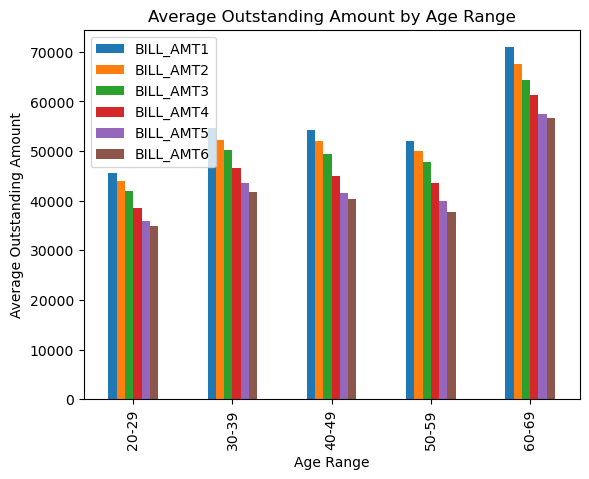

In [17]:
# Create a bar chart
age_average_outstanding.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Average Outstanding Amount')
plt.title('Average Outstanding Amount by Age Range')
plt.show()

In [18]:
#Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit

In [19]:
grouped_data = credit.groupby(['AGE', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL'])

In [20]:
mean_outstanding_amount = grouped_data['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'].mean()

C:\Users\Shweta\AppData\Local\Temp\ipykernel_23444\528716906.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_outstanding_amount = grouped_data['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'].mean()


In [21]:
mean_outstanding_amount

BILL_AMT1  BILL_AMT2      BILL_AMT3  \
AGE EDUCATION MARRIAGE LIMIT_BAL                                            
21  1         2        10000        8278.000000     7888.0   10084.000000   
                       20000       12547.666667    11966.0   11357.666667   
                       30000       32034.500000    30239.5   30543.000000   
                       50000       36809.000000    33121.0   29672.000000   
    2         1        20000       10647.666667    10958.0   14770.333333   
...                                         ...        ...            ...   
74  3         1        160000      79201.000000    69376.0   66192.000000   
75  1         1        180000          0.000000        0.0       0.000000   
    2         1        210000     205601.000000   203957.0  199882.000000   
                       250000      52874.000000     1631.0    1536.000000   
79  1         1        440000     429309.000000   437906.0  447326.000000   

                                      BILL_AMT4      BILL_AMT5      BILL_AMT6  
AGE EDUCATION MARRIAGE LIMIT_BAL                                               
21  1         2        10000        9699.000000    9699.000000       0.000000  
                       20000        9636.000000    9457.000000    5661.666667  
                       30000       29883.000000   13110.000000   14984.000000  
                       50000       22365.000000   12702.000000    4134.000000  
    2         1        20000       10146.333333   14821.333333    8072.333333  
...                                         ...            ...            ...  
74  3         1        160000      16905.000000       0.000000   19789.000000  
75  1         1        180000          0.000000       0.000000       0.000000  
    2         1        210000     203776.000000  205901.000000  210006.000000  
                       250000       1010.000000    5572.000000     794.000000  
79  1         1        440000     447112.000000  438187.000000  447543.000000  

[7381 rows x 6 columns]

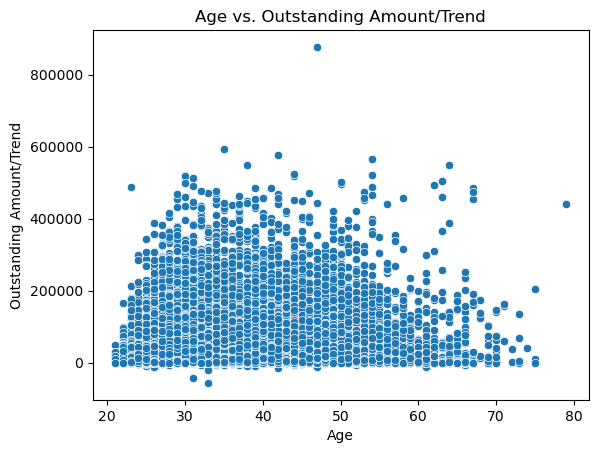

In [24]:
mean_outstanding_amount = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Create the scatter plot
sns.scatterplot(x='AGE', y=mean_outstanding_amount, data=credit)
plt.xlabel('Age')
plt.ylabel('Outstanding Amount/Trend')
plt.title('Age vs. Outstanding Amount/Trend')
plt.show()


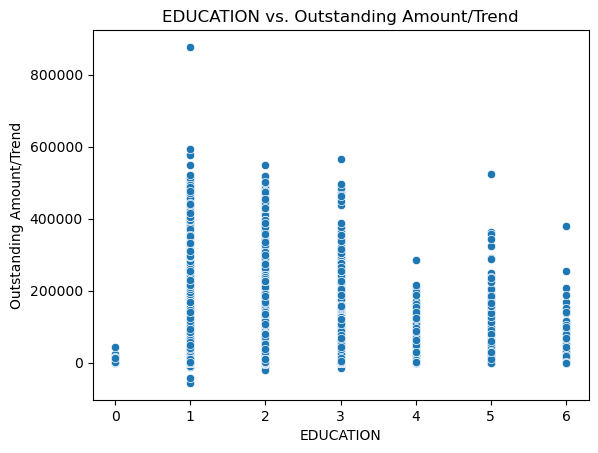

In [25]:
mean_outstanding_amount = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Create the scatter plot
sns.scatterplot(x='EDUCATION', y=mean_outstanding_amount, data=credit)
plt.xlabel('EDUCATION')
plt.ylabel('Outstanding Amount/Trend')
plt.title('EDUCATION vs. Outstanding Amount/Trend')
plt.show()

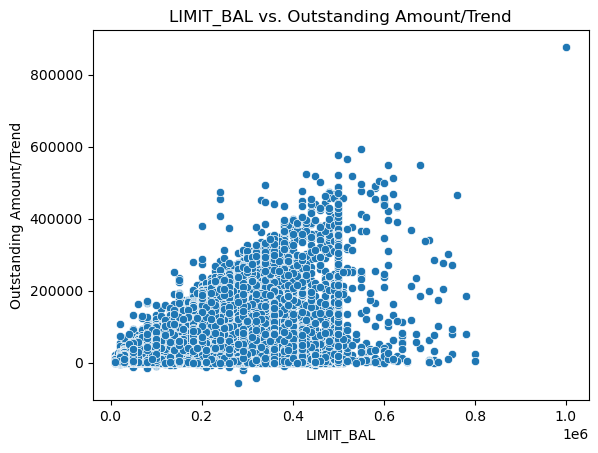

In [26]:
mean_outstanding_amount = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Create the scatter plot
sns.scatterplot(x='LIMIT_BAL', y=mean_outstanding_amount, data=credit)
plt.xlabel('LIMIT_BAL')
plt.ylabel('Outstanding Amount/Trend')
plt.title('LIMIT_BAL vs. Outstanding Amount/Trend')
plt.show()

In [28]:
credit = credit[credit['MARRIAGE'] != 0]


In [29]:
zero_count = (credit['MARRIAGE'] == 0).sum()
print("Number of zero values in 'MARRIAGE' column:", zero_count)

Number of zero values in 'MARRIAGE' column: 0


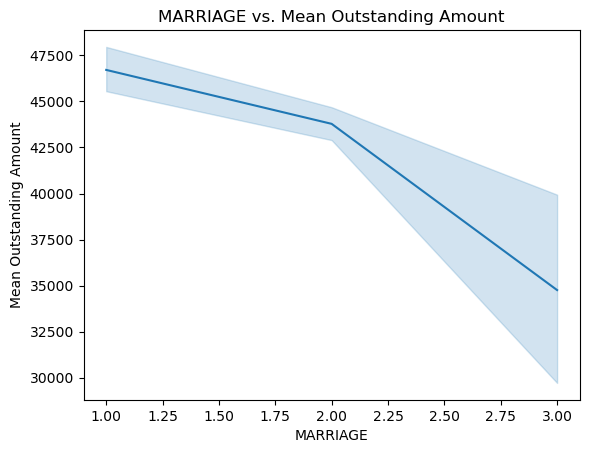

In [31]:
sns.lineplot(x=credit['MARRIAGE'], y=mean_outstanding_amount)
#plt.yticks([0, 0.5, 1, 1.5, 2])
plt.ylabel('Mean Outstanding Amount')
plt.xlabel('MARRIAGE')
plt.title('MARRIAGE vs. Mean Outstanding Amount')
plt.show()

In [22]:
#Does outstanding amount / trend affect the default behavior in next month.

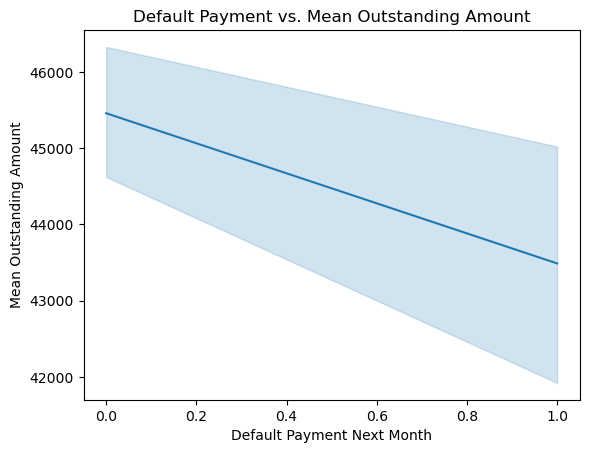

In [32]:
sns.lineplot(x=credit['default payment next month'], y=mean_outstanding_amount)
#plt.yticks([0, 0.5, 1, 1.5, 2])
plt.ylabel('Mean Outstanding Amount')
plt.xlabel('Default Payment Next Month')
plt.title('Default Payment vs. Mean Outstanding Amount')
plt.show()

In [ ]:
#Identify the errors in dataset

In [33]:
# Check for missing values

In [34]:

missing_values = credit.isnull().sum()

In [35]:
missing_values

ID                               0
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                              0
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default payment next month       0
Outstanding_Bucket            4695
Age_Range                       15
dtype: int64

In [36]:
credit = credit.dropna()

In [37]:
credit 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Outstanding_Bucket,Age_Range
1,2,120000,2,2,2,26,0,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,<10k,20-29
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,10k-20k,30-39
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,20k-30k,30-39
4,5,50000,1,2,1,57,0,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,10k-20k,50-59
5,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,20k-30k,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000,1,2,2,34,2,2,2,2,...,81158,7000,3500,0,7000,0,4000,1,50k-100k,30-39
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,10k-20k,30-39
29997,29998,30000,1,2,2,37,4,3,2,0,...,19357,0,0,22000,4200,2000,3100,1,10k-20k,30-39
29998,29999,80000,1,3,1,41,1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,40k-50k,40-49


In [39]:
duplicates = credit.duplicated()

In [40]:
duplicates

1        False
2        False
3        False
4        False
5        False
         ...  
29994    False
29995    False
29997    False
29998    False
29999    False
Length: 25238, dtype: bool

In [41]:
credit = credit.drop_duplicates()

In [42]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Outstanding_Bucket,Age_Range
1,2,120000,2,2,2,26,0,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,<10k,20-29
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,10k-20k,30-39
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,20k-30k,30-39
4,5,50000,1,2,1,57,0,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,10k-20k,50-59
5,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,20k-30k,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000,1,2,2,34,2,2,2,2,...,81158,7000,3500,0,7000,0,4000,1,50k-100k,30-39
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,10k-20k,30-39
29997,29998,30000,1,2,2,37,4,3,2,0,...,19357,0,0,22000,4200,2000,3100,1,10k-20k,30-39
29998,29999,80000,1,3,1,41,1,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,40k-50k,40-49
